# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Understanding Data


In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
ad_data.shape

(1000, 10)

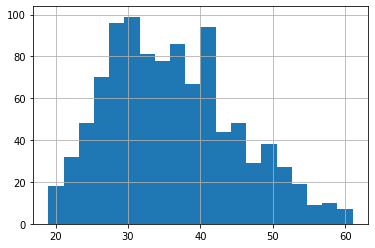

In [7]:
ad_data['Age'].hist(bins=20)

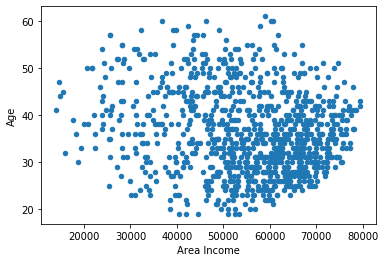

In [9]:
ad_data.plot.scatter(x="Area Income", y="Age")

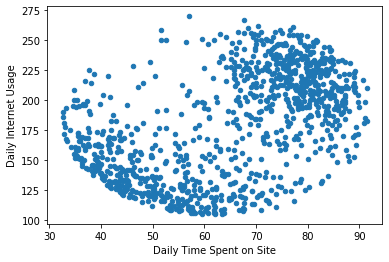

In [10]:
ad_data.plot.scatter(x="Daily Time Spent on Site", y="Daily Internet Usage")

In [11]:
ad_data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


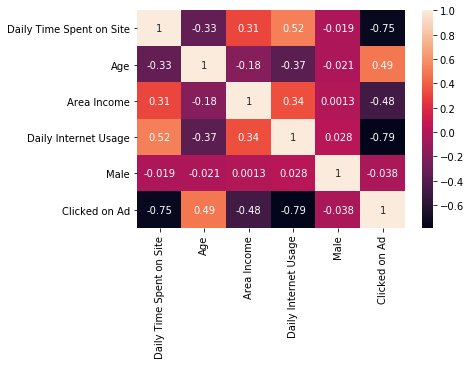

In [12]:
sns.heatmap(ad_data.corr(), annot=True)

# Logistic Regression

In [13]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [14]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [15]:
X = ad_data.drop(['Clicked on Ad'], axis = 1) #Independent Variables
y = ad_data['Clicked on Ad'] #Dependent variable

In [16]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [20]:
logmodel.fit(X_train, y_train)

LogisticRegression()

# Predictions and Evaluations

In [21]:
predictions = logmodel.predict(X_test)

In [22]:
predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], d

In [23]:
y_test

507    1
818    0
452    0
368    0
242    0
      ..
459    0
415    1
61     0
347    1
349    1
Name: Clicked on Ad, Length: 300, dtype: int64

In [24]:
logmodel.score(X_train,y_train)

0.8985714285714286

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       146
           1       0.95      0.82      0.88       154

    accuracy                           0.88       300
   macro avg       0.89      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300



# End!